In [36]:
# Part 1: Installation

# Business questions: 
# inspiration: https://www.kaggle.com/fayomi/advertising

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns



df = pd.read_csv("advertising.csv",encoding = 'latin1')
print("reading done")

reading done


In [37]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [39]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Exploratory Data Analysis

First plot: looking at age distribution among users in this data set

In [40]:
# I would like to fir look at where our users are coming from

objVariables = ['Ad Topic Line', 'City', 'Country']
df[objVariables].describe(include=['O'])  

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Robust responsive collaboration,Lisamouth,France
freq,1,3,9


As one can see here, there are nearly the same amount of unique elemtns as total number of elements for Ad Topic Line and City. However, there's 237 countries in the list. I'll omit the first two objVariables before further analysis. Something interesting is that France is seen in the dataset 9 times. I'll look more into which countries are used here.

In [42]:
pd.crosstab(index=df['Country'], columns='count').sort_values(['count'],ascending=False).head(40)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


Yeah to be honest, with no single country being too dominant, there's a good chance that no country is too dominant; so I'll omit this column as well. 

In [43]:
df = df.drop(['Ad Topic Line', 'City', 'Country'], axis=1)

Text(0.5, 0, 'Age')

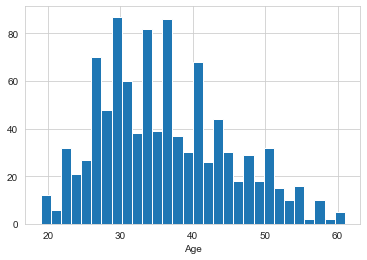

In [44]:
sns.set_style('whitegrid')
df['Age'].hist(bins=30)
plt.xlabel('Age')

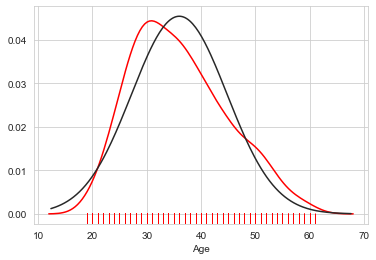

In [45]:
#OR, to visualize this in a different way
from scipy.stats import norm
sns.distplot(df['Age'],hist=False, color='r', rug=True, fit=norm)

The age distribution here looks to follow something along the lines of a normal distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


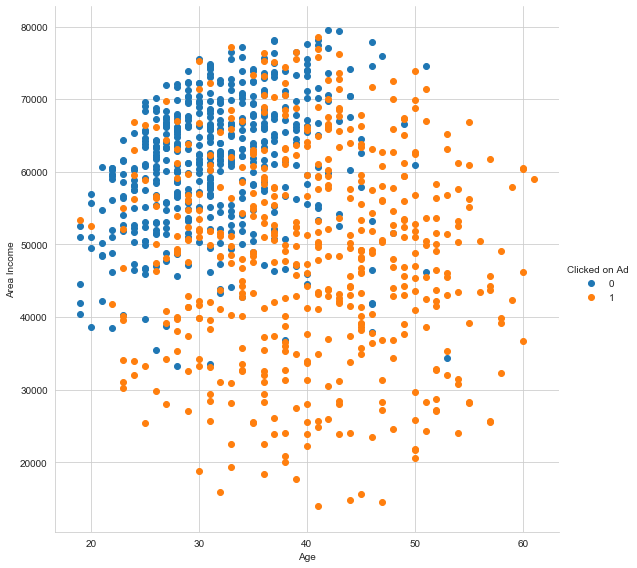

In [46]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Clicked on Ad', size=8).map(plt.scatter, "Age", "Area Income").add_legend()


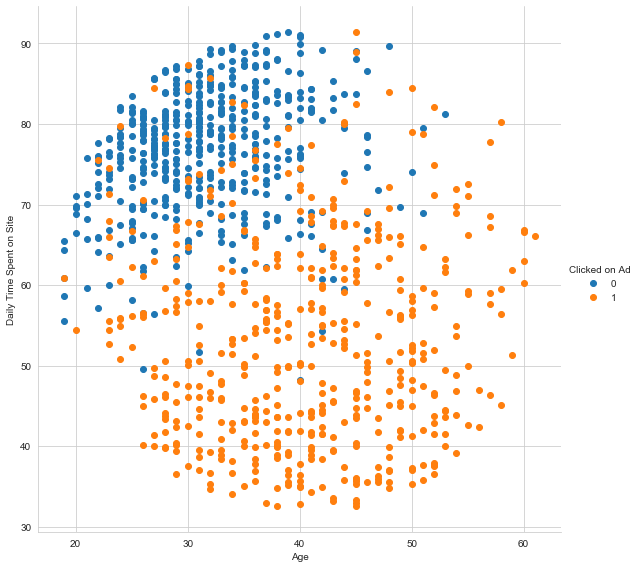

In [47]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "Clicked on Ad", size = 8).map(plt.scatter, "Age", "Daily Time Spent on Site").add_legend()

Now, I'd like to take a look at how daily internet usage relates if they clicked on the ad or not. AS we'll see in the analysis below, people with less internet usage tend to click on adds more than people who do not click ads. 

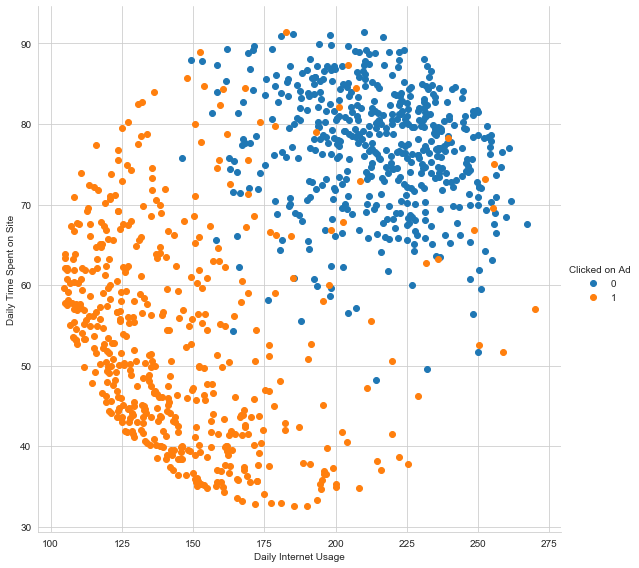

In [48]:
#sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data)
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Clicked on Ad", size=8) \
   .map(plt.scatter, "Daily Internet Usage", "Daily Time Spent on Site") \
   .add_legend()

I want to dig deaper and I'm going to try taking a look at a two-dimensional density plot to determine the interdepence of two variables.

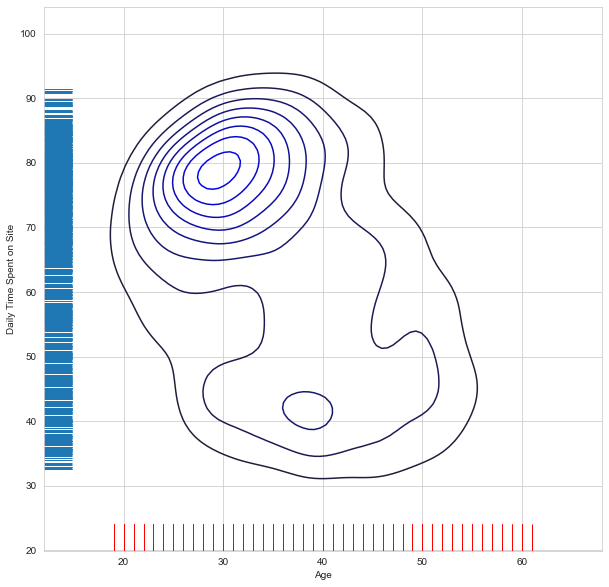

In [49]:
f, ax = plt.subplots(figsize=(10, 10))  
sns.kdeplot(df.Age, df['Daily Time Spent on Site'], color="b", ax=ax) 
sns.rugplot(df.Age, color="r", ax=ax)  
sns.rugplot(df['Daily Time Spent on Site'], vertical=True, ax=ax) 

From the picture, we can conclude that younger users spend more time on the site. This implies that users of the age between 20 and 40 years can be the main target group for the marketing campaign. Hypothetically, if we have a product intended for middle-aged people, this is the right site for advertising. Conversely, if we have a product intended for people over the age of 60, it would be a mistake to advertise on this site

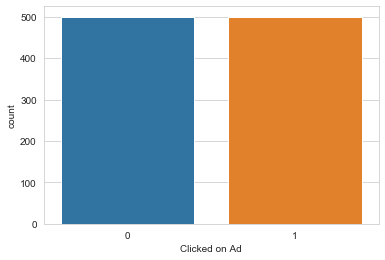

In [50]:
sns.countplot("Clicked on Ad",data=df)

Now I'm going to look into which features are the most important 

[0.20201391 0.0657381  0.06678068 0.6217865  0.01806271 0.02561815]
None


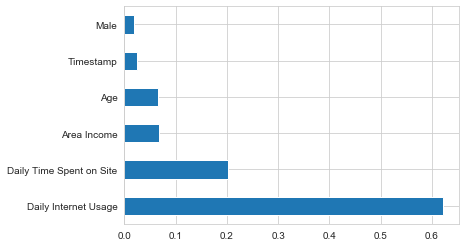

In [51]:
from xgboost import XGBClassifier
from sklearn import preprocessing
le =preprocessing.LabelEncoder()
from matplotlib import pyplot
#le.transform()
#Define the X and Y of the data

for i in df:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

X = df.loc[:, df.columns != "Clicked on Ad"]
y= df["Clicked on Ad"]
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
print(model.feature_importances_)
#

print(model.feature_importances_.sort())
feat_importances= pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [52]:
## Splitting the data 

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=455)

In [53]:
## Implement the XGBOOST model on X_train and y_train
model1 = XGBClassifier()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

In [55]:
#Evaluate my model time!

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Summary of the predictions made by the classifier
print('\n Confusion Matrix')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('\n XGBoost accuracy is',accuracy_score(y_pred,y_test))




 Confusion Matrix
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        96
           1       0.95      0.95      0.95       104

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

[[91  5]
 [ 5 99]]

 XGBoost accuracy is 0.95


The confusion matrix here tells us that the total number of accurate prediciton is 99 + 91= 190... I think the accuracy for this model is excellent.

In [58]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(solver='lbfgs')
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print('\nClassification report:', classification_report(y_test, y_pred))
print('\nLogistic regression accuracy:', accuracy_score(y_pred2, y_test))
print('\nConfusion Matrix:')
print(confusion_matrix(y_pred2, y_test))


Classification report:               precision    recall  f1-score   support

           0       0.95      0.95      0.95        96
           1       0.95      0.95      0.95       104

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200


Logistic regression accuracy: 0.92

Confusion Matrix:
[[93 13]
 [ 3 91]]


In [ ]:
As my own personal expectation, the xgboost model performed better. 
